In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import pathlib
import PIL

In [4]:
data_dir = pathlib.Path("D:\major\data")
print(data_dir)

D:\major\data


In [5]:
len(list(data_dir.glob('*/*.jpg')))


1600

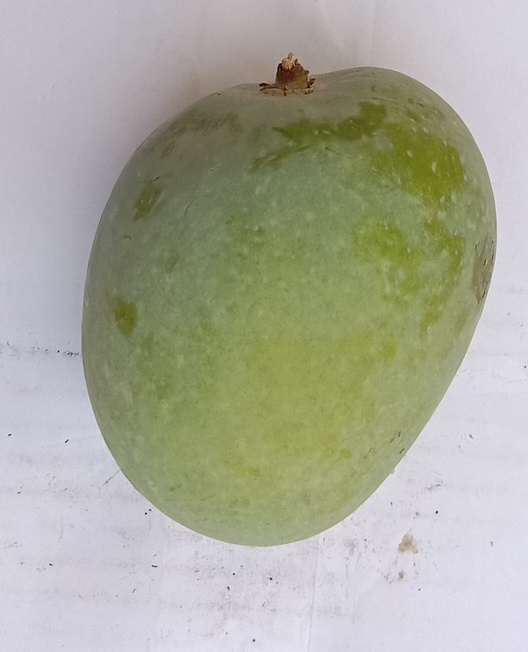

In [6]:
m1 = list(data_dir.glob('Anwar Ratool/*'))
PIL.Image.open(str(m1[0]))

In [7]:
batch_size = 32
img_height = 528
img_width = 652

In [8]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size,
)

Found 1600 files belonging to 8 classes.
Using 1280 files for training.


In [9]:
val_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size,
)

Found 1600 files belonging to 8 classes.
Using 320 files for validation.


In [13]:
class_names = train_ds.class_names
print(class_names)

['Anwar Ratool', 'Chaunsa (Black)', 'Chaunsa (Summer Bahisht)', 'Chaunsa (White)', 'Dosehri', 'Fajri', 'Langra', 'Sindhri']


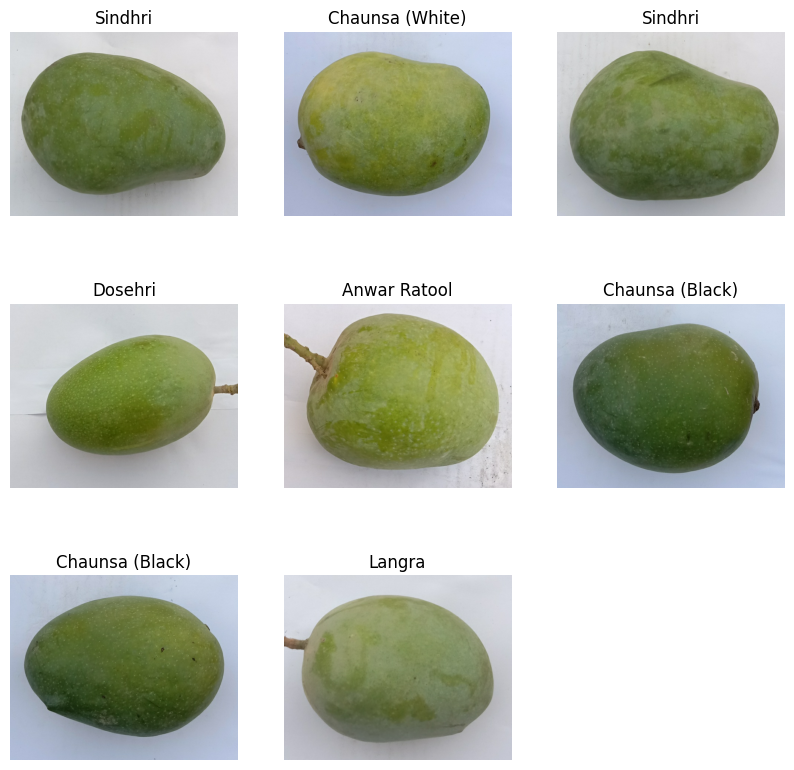

In [14]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(8):
        aax = plt.subplot(3, 3, i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis('off')
        

In [15]:
for image_batch, labels_batch in train_ds:
    print(image_batch.shape)
    print(labels_batch.shape)
    break

(32, 528, 652, 3)
(32,)


In [16]:
# Standardizing the image vales from [0, 255], to [0, 1]
normalization_layer = tf.keras.layers.Rescaling(1./255)

In [19]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, label_batch = next(iter(normalized_ds))
first_image = image_batch[0]
print(np.min(first_image), np.max(first_image))

0.0 0.9343385


In [20]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [21]:
num_classes = 8

model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(num_classes)
])

In [22]:
model.compile(
    optimizer='adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

In [23]:
model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=3,
)

Epoch 1/3
40/40 ━━━━━━━━━━━━━━━━━━━━ 97s 2s/step - accuracy: 0.1831 - loss: 639.1055 - val_accuracy: 0.3688 - val_loss: 1.6998
Epoch 2/3
40/40 ━━━━━━━━━━━━━━━━━━━━ 97s 2s/step - accuracy: 0.4801 - loss: 1.5095 - val_accuracy: 0.4969 - val_loss: 1.4360
Epoch 3/3
40/40 ━━━━━━━━━━━━━━━━━━━━ 81s 2s/step - accuracy: 0.7494 - loss: 0.8365 - val_accuracy: 0.4500 - val_loss: 1.6232
